In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
import seaborn as sns
sns.set(style='ticks')

In [2]:
def Prob_Full_Ranking(n, base=0.2, d=0.1, tau=1):
    '''
    Function generates a graph which models the probability
    of observing the comparisons necessary and sufficient 
    to determine a complete ranking using friend-based ranking
    as a function of a homophily parameter.
    
    n: even integer for number of individuals in the community 
    base: starting probability of links forming 
    d: the maximum for the homophily parameter
    tau: integer parameter to change the number 
         of across group comparisons
    '''
    x = np.linspace(0, d, 1000)
    P = []
    diff = []
    
    for h in np.nditer(x):
        p = base+h 
        q = base-(h*((n)/(n-2))) # There are [(n/2)^2 - n/2] p's versus [(n/2)^2] q's in random grah model
        P.append( ((1-((1-p**2)**((n/2)-2))*((1-q**2)**(n/2)))**(n-2-(tau-1)))*((1-((1-p*q)**(n-2)))**tau) )
        diff.append( h )
        
    plt.plot(diff, P, color='grey')
    plt.xlabel('Homophily parameter $\eta$')
    plt.ylabel('$\Pr[$ Complete ranking $]$')
    sns.despine()

In [3]:
interact(Prob_Full_Ranking, n=(10,1000,10), base=(0.15,0.4,0.01), d=(0.05,0.4,0.01), tau=(1,500,2))

interactive(children=(IntSlider(value=500, description='n', max=1000, min=10, step=10), FloatSlider(value=0.2,…

<function __main__.Prob_Full_Ranking(n, base=0.2, d=0.1, tau=1)>

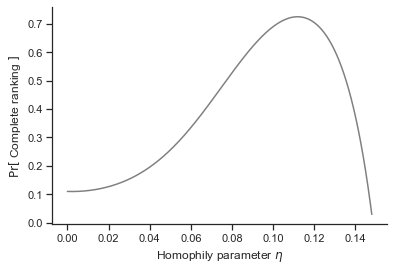

In [4]:
Prob_Full_Ranking(n=200, base=0.15, d=0.148, tau=1)
plt.savefig("figures/homophily.pdf")